<h1>With Bag of Words</h1>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import normalize


from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import train_test_split

C:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import pickle
with open('train_bow.pickle', 'rb') as f:
    x_bow=pickle.load(f)
with open('test_bow.pickle','rb') as f:
    test_bow=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [4]:
x_bow=normalize(x_bow,axis=0)
test_bow=normalize(test_bow,axis=0)

In [5]:
x_train,x_cv , y_train, y_cv = train_test_split(x_bow, y_bow, test_size=0.2, random_state=42)

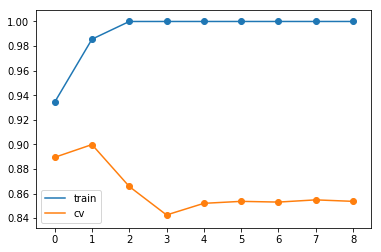

In [6]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[ 5, 10, 50, 100,500,1000,2000,3000,4000]
for i in depths:
    clf= GradientBoostingClassifier(max_depth=i)
    clf.fit(x_train, y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8],cv_metric)
plt.legend()
plt.show()

In [ ]:
#Observation:From max depth=10 the cv metric starts to overfit hence optimal max depth=10

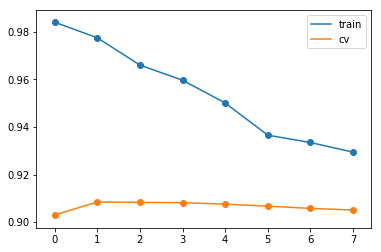

In [8]:
min_samples_split_set= [10,100,500,1000,2000,3000,4000,5000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf= GradientBoostingClassifier(max_depth=10,min_samples_split=i)
    clf.fit(x_train, y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.legend()
plt.show()

In [ ]:
#Observation:From min_samples_split=10 the cv metric starts to overfit hence optimal min_samples_split=2000
#Hence max_depth=10 and min_samples_split=2000 are best hyperparameters

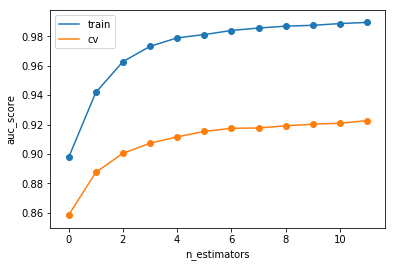

In [8]:
n_estimators= [25,50,75,100,125,150,175,200,225,250,275,300]
train_metric=[]
cv_metric=[]
for i in n_estimators:
    clf= GradientBoostingClassifier(n_estimators=i,max_depth=10,min_samples_split=500)
    clf.fit(x_train, y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10,11],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10,11],cv_metric)
plt.xlabel('n_estimators')
plt.ylabel('auc_score')
plt.legend()
plt.show()

In [9]:
#on test dataset with max_depth=10 and min_samples_split=2000
clf= GradientBoostingClassifier(n_estimators=300,max_depth=10,min_samples_split=100)
clf.fit(x_bow,y_bow)
pred=clf.predict(test_bow)
f1_score=roc_auc_score(y_test, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

75.35900649676081 %
[[ 1278  1097]
 [  354 11093]]


Text(0.5,1,'Confusion Matrix\n')

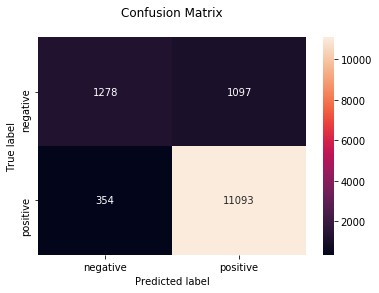

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [39]:
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

In [40]:
prob=clf.feature_importances_

In [41]:
a=np.argsort(-1*prob)
b=a[0:20]

In [42]:
b

array([ 9789,  6385, 13251,  9565,  2082,  5943, 19048, 16806, 25524,
        7735, 22502, 14559, 10821, 22723,  1482, 15252, 24022, 24964,
        1575, 17863], dtype=int64)

In [43]:
#sort array in descending order
prob[::-1].sort()
prob_list=prob.tolist()
prob_list_20=prob_list[0:20]

In [44]:
feature_list=[]
for i in b:
    print(bow_features[i])
    feature_list.append(bow_features[i])

great
disappoint
love
good
best
delici
return
perfect
worst
excel
tast
money
horribl
terribl
aw
nice
unfortun
wast
bad
product


In [45]:
dictionary = dict(zip(feature_list,prob_list_20))

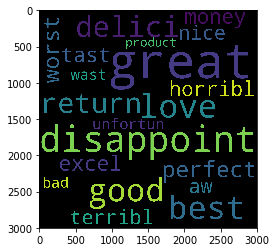

In [47]:
from PIL import Image
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black",width=3000,height=3000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dictionary)
plt.imshow(wc)

<h2>TFIDF</h2>

In [11]:
import pickle
with open('train_tfidf.pickle', 'rb') as f:
    x_tfidf=pickle.load(f)
with open('test_tfidf.pickle','rb') as f:
    test_tfidf=pickle.load(f)

In [12]:
import pickle
with open('y_train_tfidf.pickle', 'rb') as f:
    y_tfidf=pickle.load(f)
with open('y_test_tfidf.pickle','rb') as f:
    y_test_tfidf=pickle.load(f)

In [13]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_tfidf = normalize(x_tfidf, axis=0)
test_tfidf = normalize(test_tfidf, axis=0)

In [14]:
x_train_tfidf,x_cv_tfidf , y_train_tfidf, y_cv_tfidf = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=42)

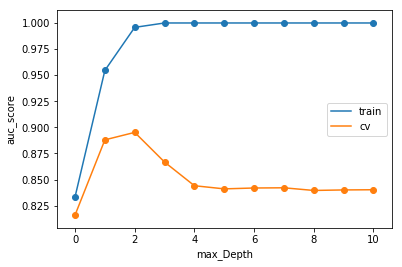

In [13]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100,500,1000,2000,3000,4000,5000]
for i in depths:
    clf= GradientBoostingClassifier(max_depth=i)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],train_metric)
plt.xlabel('max_Depth')
plt.ylabel('auc_score')
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],cv_metric)
plt.legend()
plt.show()

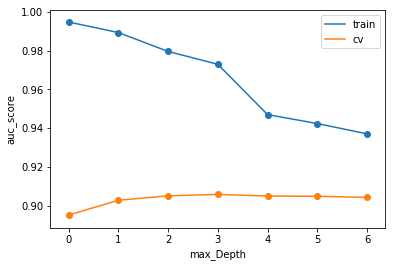

In [18]:
min_samples_split_set= [10,100,500,1000,3000,5000,7000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf= GradientBoostingClassifier(max_depth=10,min_samples_split=i)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6],cv_metric)
plt.xlabel('min_samples_split')
plt.ylabel('auc_score')
plt.legend()
plt.show()

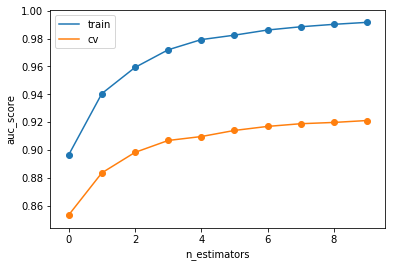

In [16]:
n_estimators= [25,50,75,100,125,150,175,200,225,250]
train_metric=[]
cv_metric=[]
for i in n_estimators:
    clf= GradientBoostingClassifier(n_estimators=i,max_depth=10,min_samples_split=1000)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9],cv_metric)
plt.xlabel('n_estimators')
plt.ylabel('auc_score')
plt.legend()
plt.show()

In [17]:
#on test dataset with max_depth=10 and min_samples_split=2000
clf= GradientBoostingClassifier(n_estimators=300,max_depth=10,min_samples_split=1000)
clf.fit(x_tfidf,y_tfidf)
pred=clf.predict(test_tfidf)
f1_score=roc_auc_score(y_test, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test_tfidf, pred)
print(conf_matrix)

76.60960122854527 %
[[ 1415   960]
 [  728 10719]]


Text(0.5,1,'Confusion Matrix\n')

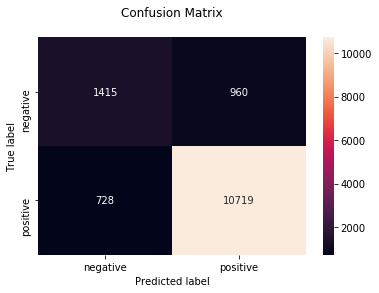

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

In [23]:
with open('tfidf_features.pickle','rb') as f:
    tfidf_features=pickle.load(f)

In [24]:
prob=clf.feature_importances_

In [25]:
a=np.argsort(-1*prob)
b=a[0:20]

In [26]:
#sort array in descending order
prob[::-1].sort()
prob_list=prob.tolist()
prob_list_20=prob_list[0:20]

In [27]:
tfidf_feature_list=[]
for i in b:
    print(tfidf_features[i])
    tfidf_feature_list.append(tfidf_features[i])

disappoint
great
return
love
worst
aw
best
good
horribl
terribl
delici
bad
tast
stale
expir
wast
money
unfortun
bland
didnt


In [28]:
tfidf_dictionary = dict(zip(tfidf_feature_list,prob_list_20))

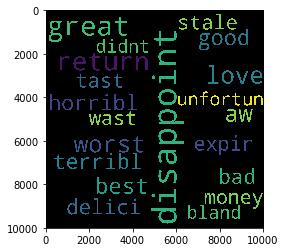

In [29]:
from PIL import Image
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black",width=10000,height=10000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tfidf_dictionary)
plt.imshow(wc)

<h2>With Avg word2vec</h2>

In [19]:
import pickle
with open('train_avgw2v.pickle', 'rb') as f:
    train_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [20]:
import pickle
with open('y_train_avgw2v.pickle', 'rb') as f:
    y_train_avgw2v=pickle.load(f)
with open('y_test_avgw2v.pickle','rb') as f:
    y_test_avgw2v=pickle.load(f)

In [21]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
train_avgw2v = normalize(train_avgw2v, axis=0)
test_avgw2v = normalize(test_avgw2v, axis=0)

In [22]:
x_train_avgw2v,x_cv_avgw2v , y_train_avgw2v, y_cv_avgw2v = train_test_split(train_avgw2v, y_train_avgw2v, test_size=0.2, random_state=42)

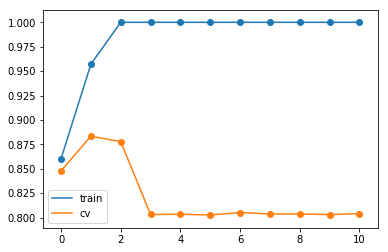

In [44]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100,500,1000,2000,3000,4000,5000]
for i in depths:
    clf= GradientBoostingClassifier(max_depth=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],cv_metric)
plt.legend()
plt.show()

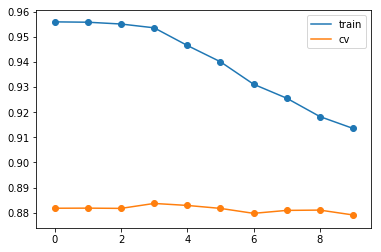

In [45]:
min_samples_split_set= [4,5,10,100,500,1000,2000,3000,4000,5000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf= GradientBoostingClassifier(max_depth=5,min_samples_split=i)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9],cv_metric)
plt.legend()
plt.show()

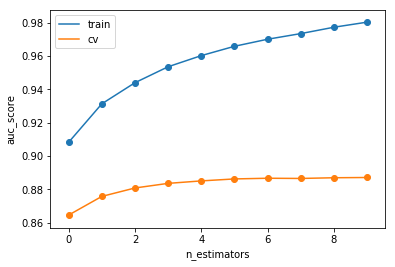

In [23]:
n_estimators= [25,50,75,100,125,150,175,200,225,250]
train_metric=[]
cv_metric=[]
for i in n_estimators:
    clf= GradientBoostingClassifier(n_estimators=i,max_depth=5,min_samples_split=100)
    clf.fit(x_train_avgw2v, y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9],cv_metric)
plt.xlabel('n_estimators')
plt.ylabel('auc_score')
plt.legend()
plt.show()

In [24]:
#on test dataset with max_depth=10 and min_samples_split=2000
clf=GradientBoostingClassifier(n_estimators=250,max_depth=5,min_samples_split=100)
clf.fit(x_train_avgw2v,y_train_avgw2v)
pred=clf.predict(test_avgw2v)
f1_score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

67.04797119907306 %
[[  938  1437]
 [  618 10829]]


Text(0.5,1,'Confusion Matrix\n')

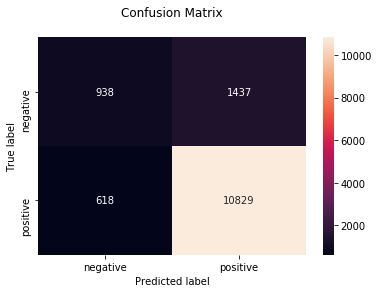

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>TFIDF Weighted w2v</h2>

In [26]:
import pickle
with open('train_tfidf_w2v.pickle', 'rb') as f:
    x_train_tfidf_w2v=pickle.load(f)
with open('test_tfidf_w2v.pickle','rb') as f:
    x_test_tfidf_w2v=pickle.load(f)

In [27]:
import pickle
with open('y_train_tfidf_w2v.pickle', 'rb') as f:
    y_train_tfidf_w2v=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test_tfidf_w2v=pickle.load(f)

In [28]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_train_tfidf_w2v = normalize(x_train_tfidf_w2v, axis=0)
x_test_tfidf_w2v = normalize(x_test_tfidf_w2v, axis=0)

In [29]:
x_train_tfidf_w2v,x_cv_tfidf_w2v , y_train_tfidf_w2v, y_cv_tfidf_w2v = train_test_split(x_train_tfidf_w2v, y_train_tfidf_w2v, test_size=0.2, random_state=42)

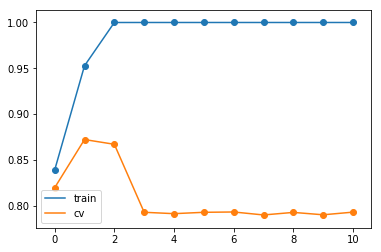

In [55]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
depths=[1, 5, 10, 50, 100,500,1000,2000,3000,4000,5000]
for i in depths:
    clf= GradientBoostingClassifier(max_depth=i)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10],cv_metric)
plt.legend()
plt.show()

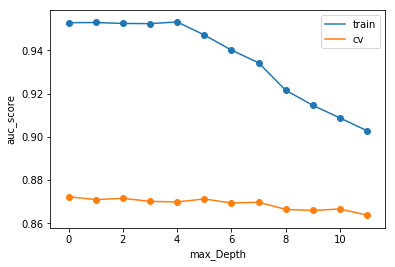

In [57]:
min_samples_split_set= [2,3,4,5,10,100,500,1000,2000,3000,4000,5000]
train_metric=[]
cv_metric=[]
for i in min_samples_split_set:
    clf= GradientBoostingClassifier(max_depth=5,min_samples_split=i)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10,11],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7,8,9,10,11],cv_metric)
plt.xlabel('max_Depth')
plt.ylabel('auc_score')
plt.legend()
plt.show()

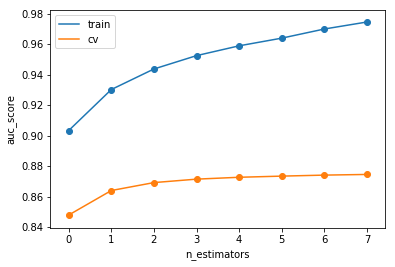

In [32]:
n_estimators= [25,50,75,100,125,150,175,200]
train_metric=[]
cv_metric=[]
for i in n_estimators:
    clf= GradientBoostingClassifier(n_estimators=i,max_depth=5,min_samples_split=4)
    clf.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4,5,6,7],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4,5,6,7],cv_metric)
plt.xlabel('n_estimators')
plt.ylabel('auc_score')
plt.legend()
plt.show()

In [33]:
#on test dataset with max_depth=10 and min_samples_split=2000
clf= GradientBoostingClassifier(n_estimators=200,max_depth=10,min_samples_split=4)
clf.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)
pred=clf.predict(x_test_tfidf_w2v)
f1_score=roc_auc_score(y_test_tfidf_w2v, pred) * float(100)
print(f1_score,"%")
conf_matrix = confusion_matrix(y_test_tfidf_w2v, pred)
print(conf_matrix)

70.4068507439294 %
[[ 632  614]
 [ 618 5619]]


Text(0.5,1,'Confusion Matrix\n')

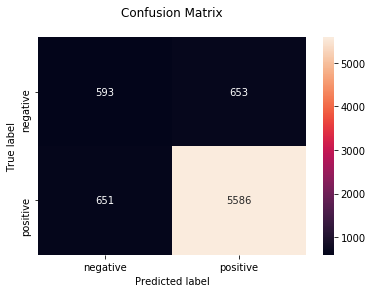

In [60]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>Observation:</h2>

|Model|n_estimators|max_depth|min_samples_split|accuracy|
|-----|---------|-----------------|--------|
|Bow|300|10|500|75.35%|
|TFIDF|300|10|1000|76.60%|
|Avgw2v|250|5|100|67.04%|
|TFIDF W2V|200|10|4|70.40%|